## ILDEBRANDO MAGNANI

im975@nyu.edu

15/04/2016

## Scikit-Learn for Linear Regression, Cross-Validation and Ridge Regression:

Scikit-Learn:

*  Simple and efficient tools for data analysis and data mining
*  Accessible to everybody, and reusable in various contexts
*  Built on NumPy, SciPy, and matplotlib
*  Open source, commercially usable 


In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import pi

We will begin by stating our "true model", defined  as $y = \cos(\pi x)$. 

In [3]:
def y(x):
    return np.cos(pi*x)

We now add some random "noise" to it in order to generate 25 data points, i.e., 25 $(x_i, y_i)$-tuples that will form our dataset. To do so, we have 

\begin{equation}
y = \cos(\pi x) + \varepsilon,    \    where   \ x\sim U[-1,1] \ and \      \varepsilon\sim N(0,0.5)
\end{equation}

In [4]:
x = np.linspace(-1, 1, 100)
X = np.random.uniform(-1, 1, 25)
X_data = X.reshape(25, 1)

y_obs_list = []

for i in range(len(X)):
    y_obs = y(X[i]) + np.random.normal(0, 0.5)
    y_obs_list.append(y_obs)

X_data = X.reshape(25, 1)
Y_data = np.asarray(y_obs_list).reshape(25, 1)

Here we want to plot the true model and the $(x_i, y_i)$-tuples we generated above.

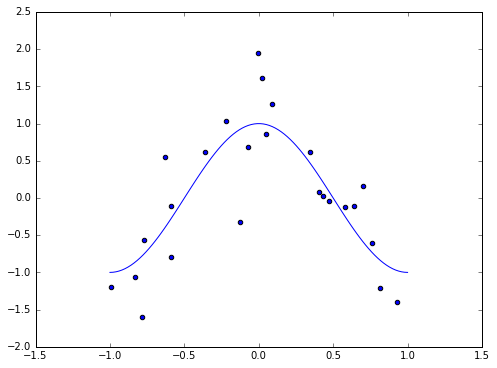

In [5]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y(x))
ax.scatter(X_data, Y_data)

Now, we use Scikit for Linear Regression. The module "LinearRegression" fits a linear model with coefficients $\beta = (\beta_1, \beta_2, \dots, \beta_p)$ to minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation. Mathematically it solves a problem of the form:

\begin{equation}
\min_{\beta} \lVert X\beta - y \rVert_{2}^2
\end{equation}

The vector of coefficients $\beta = (\beta_1, \beta_2, \dots, \beta_p)$ is designated as "coef\_" and $\beta_0$ as "intercept\_".

LinearRegression will take in its "fit" method arrays X, y and will store the coefficients $\beta$ of the linear model in its coef\_ member. By default, the "score" method returns the coefficient of determination $R^2$ of the prediction.

In [6]:
from sklearn import linear_model

In [7]:
regr = linear_model.LinearRegression()
regr.fit(X_data, Y_data)

print('intercept: \n', regr.intercept_)
print('coefficient: \n', regr.coef_)
print("Mean Squared Error: %.2f" % np.mean((regr.predict(X_data) - Y_data) ** 2))
print('R squared: %.2f' % regr.score(X_data, Y_data))

intercept: 
 [ 0.01233033]
coefficient: 
 [[ 0.13812041]]
Mean Squared Error: 0.85
R squared: 0.01


We now plot the results, which are obviously not very significant.

<function matplotlib.pyplot.show>

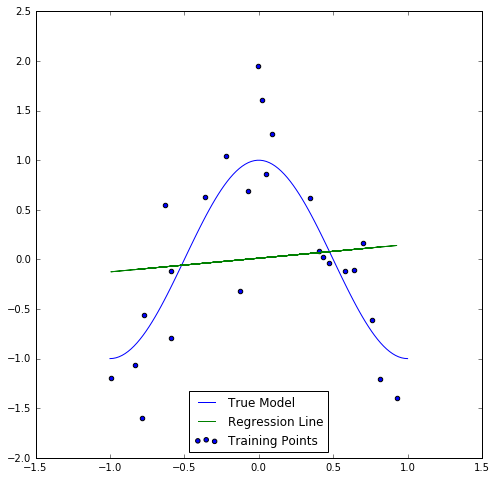

In [8]:
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(x, y(x), label = "True Model")
ax.scatter(X_data, Y_data, label = "Training Points")
ax.plot(X_data, regr.predict(X_data), label = "Regression Line")
plt.legend(loc='lower center')
plt.show

To make things more interesting, we are now going to use Scikit's linear models trained on nonlinear functions of the data. This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data.

Here, we randomly generate a $(3\times2)$ matrix $X = [x_1, x_2]$ of observations, and we will transform it to $X = [1, x_1, x_2, x_{1}^2, x_1 x_2, x_{2}^2]$ using Scikit's "PolynomialFeatures" preprocessor. This preprocessor transforms an input data matrix into a new data matrix of a given degree. It can be used as follows:

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
X_data_example = np.random.random((3, 2))

print(X_data_example)

poly = PolynomialFeatures(degree=2)

poly_X_data_example = poly.fit_transform(X_data_example)
print(poly.fit_transform(X_data_example))

[[ 0.82780005  0.94438455]
 [ 0.79859015  0.93094532]
 [ 0.20454604  0.37746037]]
[[ 1.          0.82780005  0.94438455  0.68525291  0.78176157  0.89186217]
 [ 1.          0.79859015  0.93094532  0.63774623  0.74344377  0.8666592 ]
 [ 1.          0.20454604  0.37746037  0.04183908  0.07720802  0.14247633]]


This sort of preprocessing can be streamlined with the "Pipeline" tools. In fact, Pipeline can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. Pipeline serves two purposes here:

* Convenience: You only have to call fit and predict once on your data to fit a whole sequence of estimators.

* Joint parameter selection: You can grid search over parameters of all estimators in the pipeline at once.


Now, we are going to fit the same dataset with polynomials of different degrees (2, 5, 14) and plot results. We will compute the MSE of the predictor to see how well the polynomials do in their approximation.

Mean Squared Error for Degree 2 :
0.251730890466
Mean Squared Error for Degree 5 :
0.229458178797
Mean Squared Error for Degree 14 :
0.0884120296725


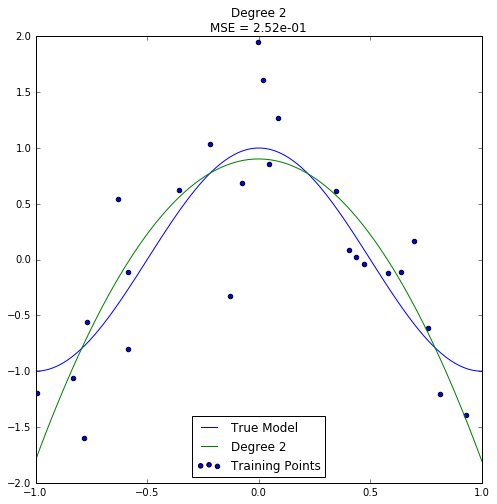

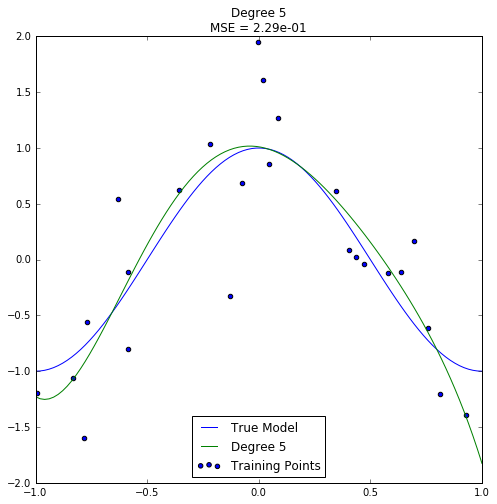

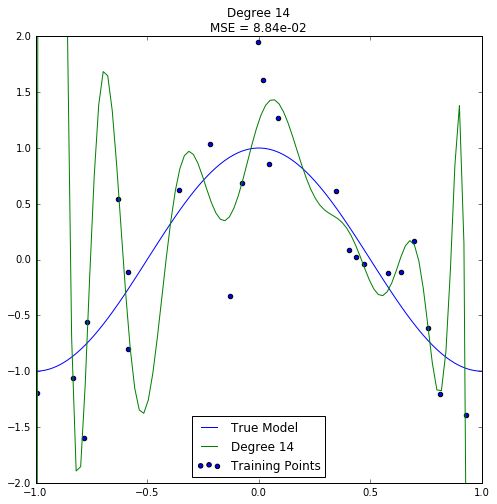

In [11]:
from sklearn.pipeline import make_pipeline

x_plot = np.linspace(-1, 1, 100).reshape(100,1)
regression = linear_model.LinearRegression()

for degree in [2, 5, 14]:
    # chain PolynomialFeatures and LinearRegression into one 
    # estimator (make_pipeline is just a shorthand for Pipeline)
    model = make_pipeline(PolynomialFeatures(degree), regression)
    model.fit(X_data, Y_data)
    
    #predict using the linear model
    y_plot = model.predict(x_plot)
    
    #plot
    fig, ax = plt.subplots(figsize=(8,8))
    ax.plot(x, y(x), label = "True Model")
    ax.scatter(X_data, Y_data, label = "Training Points")
    ax.plot(x_plot, y_plot, label="Degree %d" % degree)
    plt.legend(loc='lower center')
    
    #compute the mean squared error (MSE)
    MSE = np.mean((model.predict(X_data) - Y_data) ** 2)
    print("Mean Squared Error for Degree %d" % degree, ":")
    print(MSE)
    plt.title("Degree {}\nMSE = {:.2e}".format(degree, MSE))
    
    plt.xlim(-1, 1)
    plt.ylim(-2, 2)

plt.show()

We can see that a linear function (polynomial with degree 1) is not sufficient to fit the training samples. This is called underfitting. A polynomial of degree 5 approximates the true function almost perfectly. For higher degrees the model will overfit the training data, i.e. it learns the noise of the training data. 

Note: Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set "X_test", "Y_test".

In scikit-learn a random split into training and test sets can be quickly computed with the "train_test_split" helper function. We can quickly sample a training set while holding out 40% of the data for testing (evaluating) our classifier:

In [12]:
from sklearn.cross_validation import train_test_split

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.4, random_state=0)

In [14]:
X_train.shape, Y_train.shape

((15, 1), (15, 1))

In [15]:
X_test.shape, Y_test.shape

((10, 1), (10, 1))

We can train a linear regression model on (X-train, Y-train) data, and then compute the Mean Squared Error on the (X-test, Y-test) set.

In [16]:
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

# The coefficients
print('intercept: \n', regr.intercept_)
print('coefficient: \n', regr.coef_)
# The mean square error computed on validation sets
print("Mean Squared Error: %.2f" % np.mean((regr.predict(X_test) - Y_test) ** 2))

intercept: 
 [ 0.15169192]
coefficient: 
 [[ 0.2190235]]
Mean Squared Error: 1.34


We can do the same with "polynomial fitting".

In [17]:
regression = linear_model.LinearRegression()

for degree in [1, 2, 5, 14]:
    model = make_pipeline(PolynomialFeatures(degree), regression)
    model.fit(X_train, Y_train)  
    print("MSE on VALIDATION SET for Degree %d" % degree, ":")
    print(np.mean((model.predict(X_test) - Y_test) ** 2))

MSE on VALIDATION SET for Degree 1 :
1.33851766521
MSE on VALIDATION SET for Degree 2 :
0.506630898514
MSE on VALIDATION SET for Degree 5 :
0.747112367299
MSE on VALIDATION SET for Degree 14 :
4826715154.43


What we observe is a giant increase in the MSE for the polynomial of 14th degree. This is an obvious consequence of overfitting, i.e., with a 14th degree polynomal we are minimizing empirical risk, and not the "true" risk.

By partitioning the available data into 2 sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

*  A model is trained using k-1 of the folds as training data;
*  The resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a  performance measure such as accuracy).

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as it is the case when fixing an arbitrary test set), which is a major advantage in problem such as inverse inference where the number of samples is very small.

In [18]:
from sklearn.cross_validation import cross_val_score

The simplest way to use cross-validation is to call the "cross_val_score" helper function on the estimator and the dataset. By default, the score computed at each CV iteration is the score method of the estimator. It is possible to change this by using the scoring parameter.

The following example demonstrates how to estimate the "cross-validated" MSE of LinearRegression() on (X-data,Y-data) by splitting the data, fitting a model on k-th training set and computing the MSE 5 consecutive times on the k-th test set (with different splits each time):

In [19]:
scores = cross_val_score(linear_model.LinearRegression(), X_data, Y_data, cv = 5, scoring = 'mean_squared_error')
print("MSE array:", scores)

MSE array: [-1.14612157 -1.47367855 -0.95452968 -0.72913903 -0.77076311]


When the cv argument is an integer, "cross_val_score uses" the KFold by default.

"The Mean Square Error returned by sklearn.cross_validation.cross_val_score is always a negative. While being a designed decision so that the output of this function can be used for maximization given some hyperparameters, it's extremely confusing when using cross_val_score directly".

https://github.com/scikit-learn/scikit-learn/issues/2439

From Scikit Documentation: "Whether score_func is a score function (default), meaning high is good, 
or a loss function, meaning low is good. In the latter case, the scorer 
object will sign-flip the outcome of the score_func".

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html

In [20]:
from sklearn.metrics.scorer import SCORERS
print(SCORERS.keys())

dict_keys(['recall_micro', 'mean_absolute_error', 'f1_samples', 'adjusted_rand_score', 'average_precision', 'recall', 'mean_squared_error', 'r2', 'precision_weighted', 'recall_weighted', 'accuracy', 'f1_macro', 'f1', 'precision', 'roc_auc', 'f1_micro', 'precision_samples', 'recall_samples', 'f1_weighted', 'log_loss', 'precision_micro', 'recall_macro', 'median_absolute_error', 'precision_macro'])


There are many built-in scoring metrics. However, we can always define our own metric:

In [21]:
def my_own_scoring(regr, X_data, Y_data):
    return np.mean(regr.predict(X_data) == Y_data)

cross_val_score(regr, X_data, Y_data, cv = 5, scoring = my_own_scoring)

array([ 0.,  0.,  0.,  0.,  0.])

Scikit-Learn provides many tools to generate indices that can be used to generate dataset splits according to different cross validation strategies.

For example, we have the "KFold", which divides all the samples in k groups of samples, called folds (if k = n, this is equivalent to the Leave One Out strategy), of equal sizes (if possible). The prediction function is learned using k - 1 folds, and the fold left out is used for test.

Example of 5-fold cross-validation on a dataset with 25 samples:

In [22]:
from sklearn.cross_validation import KFold

In [23]:
kf = KFold(n = len(X_data), n_folds = 5, shuffle = True)
MSE_kth_list = []
print("len(kf):", len(kf))

for train_index, test_index in kf:
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_data[train_index], X_data[test_index]
    Y_train, Y_test = Y_data[train_index], Y_data[test_index]
    regr = linear_model.LinearRegression().fit(X_train, Y_train)
    MSE_kth = np.mean((regr.predict(X_test) - Y_test) ** 2)
    MSE_kth_list.append(MSE_kth)

len(kf): 5
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 13 14 15 16 17 20 21 23 24] TEST: [ 7 12 18 19 22]
TRAIN: [ 1  2  3  4  5  7  8  9 10 12 14 15 16 17 18 19 20 21 22 24] TEST: [ 0  6 11 13 23]
TRAIN: [ 0  1  2  3  5  6  7  8 10 11 12 13 14 15 17 18 19 20 22 23] TEST: [ 4  9 16 21 24]
TRAIN: [ 0  1  4  6  7  8  9 10 11 12 13 15 16 18 19 20 21 22 23 24] TEST: [ 2  3  5 14 17]
TRAIN: [ 0  2  3  4  5  6  7  9 11 12 13 14 16 17 18 19 21 22 23 24] TEST: [ 1  8 10 15 20]


Each fold is constituted by two arrays: the first one is related to the training set, and the second one to the test set. Thus, one can create the training/test sets using numpy indexing.

We know print the MSE that results from the 5-folds average .

In [24]:
print("Average k-fold MSE:", np.mean(MSE_kth_list))

Average k-fold MSE: 0.996664633076


Another example of cross-validation strategy is the "LeaveOneOut" (or LOO, a simple cross-validation. Each learning set is created by taking all the samples except one, the test set being the sample left out. Thus, for n samples, we have n different training sets and n different tests set. This cross-validation procedure does not waste much data as only one sample is removed from the training set:

In [25]:
from sklearn.cross_validation import LeaveOneOut

In [26]:
loo = LeaveOneOut(len(X_data))

for train_index, test_index in loo:
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_data[train_index], X_data[test_index]
    Y_train, Y_test = Y_data[train_index], Y_data[test_index]

TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] TEST: [0]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] TEST: [1]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] TEST: [2]
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] TEST: [3]
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] TEST: [4]
TRAIN: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] TEST: [5]
TRAIN: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] TEST: [6]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] TEST: [7]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] TEST: [8]
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] TEST: [9]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21 22 23 24] TEST: [10

---------------------------------------------------------------------------------------------------------------------

We now turn to Ridge Regression. 

Applying Tikhonov regularization argument to OLS, we can find a new (this time biased) estimator for $\beta$ coefficients that has always lower MSE. In particular, the estimator is designed to solve the problem

\begin{equation}
\min_{b\in\mathbb{R}} \left[\sum_{n=1}^{N} (y_n - \mathbf{x_n'b})^2 + \lambda \lVert\mathbf{b}\rVert_2^2\right]
\end{equation}

where $\lambda \geq 0$ is called "regularization parameter". In other words, we are minimizing empirical risk plus a regularization term that penalizes large values of $\lVert\mathbf{b}\rVert$. It can be shown that there always exists a $\lambda > 0$ such that the $MSE(\beta_{\lambda})$ < $MSE(\beta)$, even if $\beta_{\lambda}$ is always biased. "The reduction in mean squared error over the least squares estimator occurs because, for some intermediate
value of $\lambda$, the variance of $\beta_{\lambda}$ falls by more than enough to offset the extra bias" (Stachurski, Econometric Theory). The outcome of Ridge regression depends a lot on the non-trivial choice of the $\lambda$ value.

As with other linear models, Ridge will take in its fit method arrays $X$, $y$ and will store the coefficients $\beta$ of the linear model in its "coef\_" member:

In [27]:
from sklearn.linear_model import Ridge

In [28]:
Ridge_regr = Ridge(alpha=0.5)
Ridge_regr.fit(X_data, Y_data)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [29]:
print('Intercept: \n', Ridge_regr.intercept_)
print('Coefficient: \n', Ridge_regr.coef_)
print("Mean Squared Error: %.2f" % np.mean((Ridge_regr.predict(X_data) - Y_data) ** 2))
print('R^2: %.2f' % Ridge_regr.score(X_data, Y_data))

Intercept: 
 [ 0.01240888]
Coefficient: 
 [[ 0.1301897]]
Mean Squared Error: 0.85
R^2: 0.01


RidgeCV implements ridge regression with built-in cross-validation of the alpha parameter. It defaults to Generalized Cross-Validation (GCV), an efficient form of leave-one-out (LOO) cross-validation:

In [30]:
from sklearn.linear_model import RidgeCV

In [31]:
# a list of possible lambda values 
lambda_list = [0.1, 1, 5, 10]

RidgeCV_regr = RidgeCV(alphas = lambda_list, scoring = 'mean_squared_error')
RidgeCV_regr.fit(X_data, Y_data)

RidgeCV(alphas=[0.1, 1, 5, 10], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring='mean_squared_error', store_cv_values=False)

In [32]:
print("Cross-Validated alpha:", RidgeCV_regr.alpha_)

Cross-Validated alpha: 10.0


---------------------------------------------------------------------------------------------------------------------

In this final example, we demonstrates the problems of underfitting and overfitting and how we can use Ridge regression with polynomial features to approximate nonlinear functions. The plot shows the function that we want to approximate, which is a part of the cosine function. In addition, the samples from the real function and the approximations of different models are displayed. The models have polynomial features of different degrees. 

We are using Ridge regression throguh "RidgeCV", so we choose our regularization parameter $\lambda$ by means of cross-validation. We evaluate quantitatively overfitting / underfitting by using cross-validation. We calculate the mean squared error (MSE) on the validation set, the higher, the less likely the model generalizes correctly from the training data.

Cross-Validated Lambda for degree: 1
10.0
Cross-Validated MSE:
0.931770568646
Cross-Validated Lambda for degree: 2
0.1
Cross-Validated MSE:
0.343755078482
Cross-Validated Lambda for degree: 5
0.1
Cross-Validated MSE:
0.424128712459
Cross-Validated Lambda for degree: 14
0.1
Cross-Validated MSE:
0.463556056445


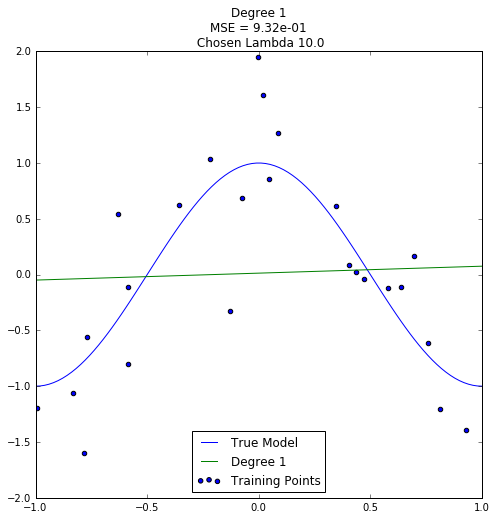

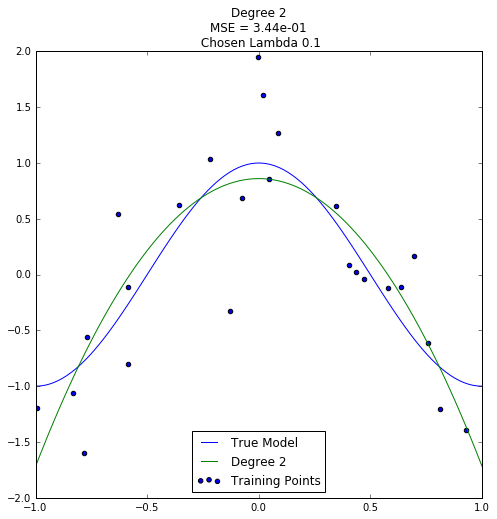

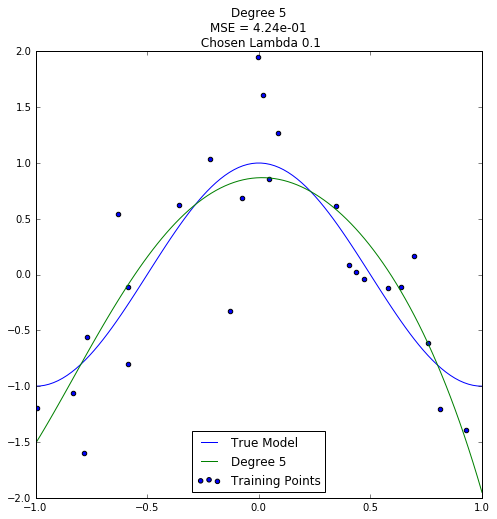

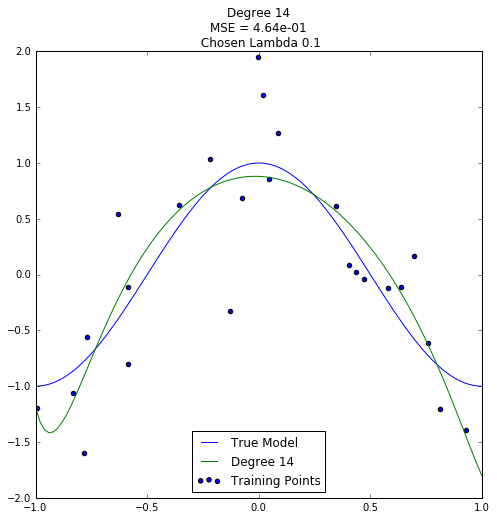

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

x_plot = np.linspace(-1, 1, 100).reshape(100,1)

for degree in [1, 2, 5, 14]:
    model = make_pipeline(PolynomialFeatures(degree), RidgeCV_regr)
    model.fit(X_data, Y_data)
    print("Cross-Validated Lambda for degree: %d" % degree)
    print(RidgeCV_regr.alpha_)
    
    # Evaluate the models using crossvalidation
    scores = cross_val_score(model, X_data, Y_data, scoring="mean_squared_error", cv=10)
    
    y_plot = model.predict(x_plot) 
    
    #plot
    fig, ax = plt.subplots(figsize=(8,8))
    ax.plot(x, y(x), label = "True Model")
    ax.scatter(X_data, Y_data, label = "Training Points")
    ax.plot(x_plot, y_plot, label="Degree %d" % degree)
    plt.legend(loc='lower center')
    print("Cross-Validated MSE:")
    print(-scores.mean())
    plt.title("Degree {}\nMSE = {:.2e}\n Chosen Lambda {}".format(degree, -scores.mean(), RidgeCV_regr.alpha_))
    plt.xlim(-1, 1)
    plt.ylim(-2, 2)

plt.show()

---------------------------------------------------------------------------------------------------------------------

# References:

* Econometric Theory, Stachurski
* Lectures on Scikit-Learn, Andreas Mueller
* Scikit-Learn Documentation